In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [182]:
# Loading the diabetes dataset to a Pandas DataFrame
diabetes_dataset = pd.read_csv('./Datasets/diabetes.csv')

In [183]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [184]:
# number of rows and cloumns in this dataset
diabetes_dataset.shape

(768, 9)

In [185]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [186]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non_Diabetic

1 --> Diabetic

In [187]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [188]:
# Separating data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

Data Standardization

In [189]:
# scaler = StandardScaler()
# scaler.fit(X)
# standardized_data = scaler.transform(X)
# print(standardized_data)

In [190]:
# X = standardized_data
# Y = diabetes_dataset['Outcome']

In [191]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Train Test Split

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [193]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Support Vector Machine Classifier: Training the Model

In [194]:
classifier = svm.SVC(kernel='linear')
# training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [195]:
# accuracy score on the training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [196]:
print('Accuracy Score of the training data: ', training_data_accuracy)

Accuracy Score of the training data:  0.7833876221498371


In [197]:
# accuracy score on testing data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [198]:
print('Accuracy score on test data: ', test_data_accuracy)

Accuracy score on test data:  0.7727272727272727


Making a Predictive System

In [199]:
input_data = (1,85,66,29,0,26.6,0.351,31)

#  Change input data to numpyarray
input_data_numpyarray = np.asarray(input_data)

# Reshape the aray as we predict for one instance
input_data_reshaped = input_data_numpyarray.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
  print('The individual is Non-Diabetic')
else:
  print('The person is Diabetic')

[[-0.84152431 -1.15121561 -0.17913848  0.51396968 -0.70188945 -0.69709361
  -0.3555664  -0.19227539]]
[0]
The individual is Non-Diabetic


d:\Disease_Prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\Disease_Prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Hyperparameter Tuning

In [200]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Perform grid search
# grid_search.fit(X_train, Y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Evaluate the best model on test data
# best_model_accuracy = best_model.score(X_test, Y_test)
# print("Accuracy on test data with best model:", best_model_accuracy)

In [201]:
# Evaluation Matrics

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predictions on test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Precision: 0.35064935064935066
Recall: 1.0
F1-score: 0.5192307692307693
ROC-AUC score: 0.5


d:\Disease_Prediction\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


### Random Forest Classifier

In [202]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the training data
Y_train_pred_rf = rf_classifier.predict(X_train)

In [203]:
# Calculate training metrics
accuracy_train_rf = accuracy_score(Y_train, Y_train_pred_rf)
precision_train_rf = precision_score(Y_train, Y_train_pred_rf)
recall_train_rf = recall_score(Y_train, Y_train_pred_rf)
f1_train_rf = f1_score(Y_train, Y_train_pred_rf)
roc_auc_train_rf = roc_auc_score(Y_train, Y_train_pred_rf)

print("Training Metrics:")
print("Accuracy:", accuracy_train_rf)
print("Precision:", precision_train_rf)
print("Recall:", recall_train_rf)
print("F1-score:", f1_train_rf)
print("ROC-AUC score:", roc_auc_train_rf)

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC score: 1.0


In [204]:
# Predict on the test data
Y_test_pred_rf = rf_classifier.predict(X_test)

In [205]:
# Calculate test metrics
accuracy_test_rf = accuracy_score(Y_test, Y_test_pred_rf)
precision_test_rf = precision_score(Y_test, Y_test_pred_rf)
recall_test_rf = recall_score(Y_test, Y_test_pred_rf)
f1_test_rf = f1_score(Y_test, Y_test_pred_rf)
roc_auc_test_rf = roc_auc_score(Y_test, Y_test_pred_rf)

print("\nTest Metrics:")
print("Accuracy:", accuracy_test_rf)
print("Precision:", precision_test_rf)
print("Recall:", recall_test_rf)
print("F1-score:", f1_test_rf)
print("ROC-AUC score:", roc_auc_test_rf)


Test Metrics:
Accuracy: 0.7532467532467533
Precision: 0.6904761904761905
Recall: 0.5370370370370371
F1-score: 0.6041666666666666
ROC-AUC score: 0.7035185185185185


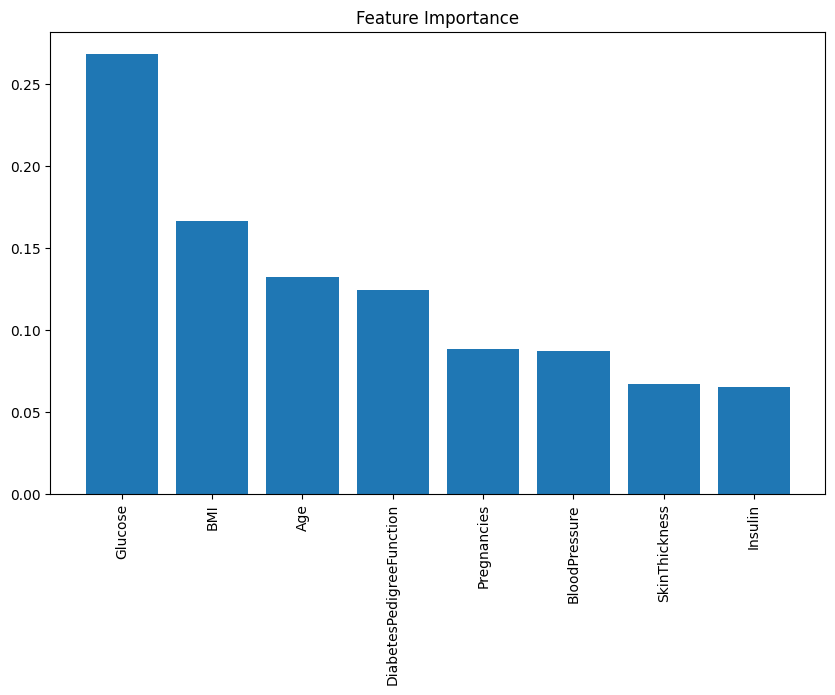

In [206]:
# Feature Selection
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names based on feature importances
names = [diabetes_dataset.columns[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(diabetes_dataset.shape[1]-1), feature_importances[indices])
plt.xticks(range(diabetes_dataset.shape[1]-1), names, rotation=90)
plt.show()

In [207]:
from sklearn.linear_model import LogisticRegressionCV

# Perform L1 regularization with logistic regression
logreg_l1 = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear', scoring='accuracy', random_state=42)
logreg_l1.fit(X_train, Y_train)

# Get selected features
selected_features = np.where(logreg_l1.coef_[0] != 0)[0]

# Print selected features
print("Selected features after L1 regularization:")
for index in selected_features:
    print(diabetes_dataset.columns[index])

Selected features after L1 regularization:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


### Hyperparameter Tuning

In [208]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train[:, selected_features], Y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# # Evaluate the model on the test data
# best_rf_model = grid_search.best_estimator_
# test_accuracy = best_rf_model.score(X_test[:, selected_features], Y_test)
# print("Accuracy on test data with best model:", test_accuracy)

## Gradient Boost Classifier

In [209]:
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Fit the model
gb_clf.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [210]:
# Make predictions
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

In [211]:
# Training metrics
print("Training Metrics:")
print("Accuracy:", accuracy_score(Y_train, y_train_pred))
print("Precision:", precision_score(Y_train, y_train_pred))
print("Recall:", recall_score(Y_train, y_train_pred))
print("F1-score:", f1_score(Y_train, y_train_pred))
print("ROC-AUC score:", roc_auc_score(Y_train, y_train_pred))

Training Metrics:
Accuracy: 0.8697068403908795
Precision: 0.8383838383838383
Recall: 0.7757009345794392
F1-score: 0.8058252427184466
ROC-AUC score: 0.8478504672897197


In [212]:
# Testing metrics
print("\nTest Metrics:")
print("Accuracy:", accuracy_score(Y_test, y_test_pred))
print("Precision:", precision_score(Y_test, y_test_pred))
print("Recall:", recall_score(Y_test, y_test_pred))
print("F1-score:", f1_score(Y_test, y_test_pred))
print("ROC-AUC score:", roc_auc_score(Y_test, y_test_pred))


Test Metrics:
Accuracy: 0.7532467532467533
Precision: 0.7
Recall: 0.5185185185185185
F1-score: 0.5957446808510638
ROC-AUC score: 0.6992592592592592


### Advanced Hyperparameter Tuning using Optuna on Random Forest Model

In [213]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assume X and y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define the search space
    n_estimators = trial.suggest_int('n_estimators', 10, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    
    # Create and fit the model
    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )
    model.fit(X_train, Y_train)
    
    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

best_params = study.best_params
best_accuracy = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

[I 2024-04-23 06:17:04,779] A new study created in memory with name: no-name-945994d0-e28d-4b6f-a17a-19079d43ae64
[I 2024-04-23 06:17:05,187] Trial 0 finished with value: 0.6493506493506493 and parameters: {'n_estimators': 273, 'max_depth': 5, 'min_samples_split': 0.6929194751183734, 'min_samples_leaf': 0.10839922151690172}. Best is trial 0 with value: 0.6493506493506493.
[I 2024-04-23 06:17:06,064] Trial 1 finished with value: 0.6818181818181818 and parameters: {'n_estimators': 578, 'max_depth': 27, 'min_samples_split': 0.4701398455907617, 'min_samples_leaf': 0.10481983304386554}. Best is trial 1 with value: 0.6818181818181818.
[I 2024-04-23 06:17:07,229] Trial 2 finished with value: 0.7207792207792207 and parameters: {'n_estimators': 716, 'max_depth': 2, 'min_samples_split': 0.23879422452019963, 'min_samples_leaf': 0.145896277052421}. Best is trial 2 with value: 0.7207792207792207.
[I 2024-04-23 06:17:08,079] Trial 3 finished with value: 0.7272727272727273 and parameters: {'n_estimat

Best Parameters: {'n_estimators': 16, 'max_depth': 6, 'min_samples_split': 0.21429404466785762, 'min_samples_leaf': 0.1583166492103443}
Best Accuracy: 0.7467532467532467


In [214]:
import pickle
filename = 'diabetes_model.pkl'
pickle.dump(rf_classifier, open(filename, 'wb'))
print("Model saved successfully as ", filename)

Model saved successfully as  diabetes_model.pkl


In [215]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# # Save the scaler to a file
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)